###### 1.go to https://github.com/miaow1988/SqueezeNet_v1.2 and download the 'symbol.json' and '.params' files (there is not a 'synset.txt' file! so don't use these lines, Hint: just comment these lines).
###### Install MXNet v1.5 (hint: create a new conda environmet with python 3, pip install mxnet==1.5.1) and follow the same steps of the lecture (part: Using pre-trained models as feature extractors). Find the flatten output layer and create a feature extractor (hint: It should be a numpy array of 1000 elements).
###### Download the dogs versus cats training folder from https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data (Remember the number of images is 12500 for each class).
###### Extract the array of features for different number of images (N: 10, 100, 500, 1000, also 5000 and 12500) and for each value train your favorite binary classifier (only one!!!) using GridSearch to optimize some hyperparameters. Consider to use https://notebooks.csc.fi if you have computational limitations.
###### Report the accuracy for each value of N and the computational time during the training step.

In [8]:
!pip install mxnet==1.5.1

     |████████████████████████████████| 23.1 MB 42.9 MB/s eta 0:00:01  |████████████                    | 8.7 MB 1.9 MB/s eta 0:00:081.9 MB/s eta 0:00:07/s eta 0:00:06��█████████████████             | 13.7 MB 1.9 MB/s eta 0:00:060:04.5 MB 1.9 MB/s eta 0:00:03��██████████▎   | 20.4 MB 1.9 MB/s eta 0:00:02�██▌| 22.8 MB 1.9 MB/s eta 0:00:01
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.13.2
    Uninstalling graphviz-0.13.2:
      Successfully uninstalled graphviz-0.13.2


In [5]:
import mxnet as mx

path = 'https://github.com/miaow1988/SqueezeNet_v1.2/'
[
    mx.test_utils.download(path +'/blob/master/model-symbol.json'),
    mx.test_utils.download(path +'blob/master/model-0000.params'),
]

['model-symbol.json', 'model-0000.params']

In [8]:
!wget https://github.com/miaow1988/SqueezeNet_v1.2/raw/master/model-symbol.json
!wget https://github.com/miaow1988/SqueezeNet_v1.2/raw/master/model-0000.params

--2020-11-07 10:23:47--  https://github.com/miaow1988/SqueezeNet_v1.2/raw/master/model-symbol.json
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/miaow1988/SqueezeNet_v1.2/master/model-symbol.json [following]
--2020-11-07 10:23:47--  https://raw.githubusercontent.com/miaow1988/SqueezeNet_v1.2/master/model-symbol.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.84.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.84.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24187 (24K) [text/plain]
Saving to: ‘model-symbol.json’

model-symbol.json   100%[===================>]  23.62K  --.-KB/s    in 0.01s   

2020-11-07 10:23:47 (1.57 MB/s) - ‘model-symbol.json’ saved [24187/24187]

--2020-11-07 10:23:48--  https://github.com/miaow1988/SqueezeN

In [10]:
! pip install opencv-python-headless
! pip install --user kaggle --upgrade

     |████████████████████████████████| 36.7 MB 42.8 MB/s eta 0:00:01MB 2.1 MB/s eta 0:00:13                  | 13.6 MB 2.1 MB/s eta 0:00:12��█████████▎                | 17.5 MB 2.1 MB/s eta 0:00:10████████████████▌               | 18.9 MB 2.1 MB/s eta 0:00:09████▍             | 21.1 MB 2.1 MB/s eta 0:00:08�████████▊           | 23.7 MB 42.8 MB/s eta 0:00:01101███████████▏      | 28.9 MB 42.8 MB/s eta 0:00:01 | 30.8 MB 42.8 MB/s eta 0:00:01|████████████████████████████▉   | 33.1 MB 42.8 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 1.5 MB/s eta 0:00:011
     |████████████████████████████████| 78 kB 3.4 MB/s eta 0:00:011
  Created wheel for kaggle: filename=kaggle-1.5.9-py3-none-any.whl size=73265 sha256=d2a32e42c1c9ad13d7feeaae1eac66f910874e3ef556195531f1285a0431c762
  Stored in directory: /home/jovyan/.cache/pip/wheels/09/25/76/1bbe8ad0c423e8655942b6d3c781f58e0ea2791bf8ee8985b3
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size

In [15]:
# if "opencv-python" not in pkgs:
#     !pip install opencv-python
# if "opencv-contrib-python" not in pkgs:
#     !pip install opencv-contrib-python

### Upload your https://github.com/Kaggle/kaggle-api#api-credentials

In [11]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/home/jovyan/.kaggle’: File exists


In [12]:
! mv kaggle.json .kaggle/kaggle.json

In [13]:
! chmod 600 ~/.kaggle/kaggle.json

In [17]:
! ls -l ~/.kaggle

total 4
-rw-------. 1 jovyan root 63 Nov  7 10:19 kaggle.json


In [20]:
! ls -l ~/.local/bin

total 8
-rwxr-xr-x. 1 jovyan root 217 Nov  7 10:24 kaggle
-rwxr-xr-x. 1 jovyan root 333 Nov  7 10:24 slugify


In [19]:
!pip show kaggle

Name: kaggle
Version: 1.5.9
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /home/jovyan/.local/lib/python3.7/site-packages
Requires: tqdm, certifi, requests, urllib3, six, slugify, python-slugify, python-dateutil
Required-by: 


In [21]:
! find / -name kaggle 2>/dev/null

/home/jovyan/.local/lib/python3.7/site-packages/kaggle
/home/jovyan/.local/bin/kaggle


In [24]:
# !kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

In [1]:
! unzip dogs-vs-cats-redux-kernels-edition.zip

Archive:  dogs-vs-cats-redux-kernels-edition.zip
   creating: dogs-vs-cats-redux-kernels-edition/
  inflating: dogs-vs-cats-redux-kernels-edition/test.zip  
   creating: __MACOSX/
   creating: __MACOSX/dogs-vs-cats-redux-kernels-edition/
  inflating: __MACOSX/dogs-vs-cats-redux-kernels-edition/._test.zip  
  inflating: dogs-vs-cats-redux-kernels-edition/train.zip  
  inflating: __MACOSX/dogs-vs-cats-redux-kernels-edition/._train.zip  
  inflating: dogs-vs-cats-redux-kernels-edition/sample_submission.csv  
  inflating: __MACOSX/dogs-vs-cats-redux-kernels-edition/._sample_submission.csv  
  inflating: __MACOSX/._dogs-vs-cats-redux-kernels-edition  


In [ ]:
! unzip ~/dogs-vs-cats-redux-kernels-edition/train.zip

In [9]:
import mxnet as mx
import numpy as np
from mxnet import nd,autograd
from mxnet import gluon

%matplotlib inline
import matplotlib.pyplot as plt
import cv2

# define a simple data batch
from collections import namedtuple
Batch = namedtuple('Batch', ['data'])

In [11]:
context=mx.cpu()

In [13]:
mod = mx.mod.Module(symbol=sym, context=mx.cpu(), label_names=None)
mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))], 
         label_shapes=mod._label_shapes)
mod.set_params(arg_params, aux_params, allow_missing=True)
# with open('pretrained/synset.txt', 'r') as f:
#     labels = [l.rstrip() for l in f]

In [100]:
sym, arg_params, aux_params = mx.model.load_checkpoint('model', 0)

In [17]:
def get_image(url, show=False):
    if url.startswith('http'):
        # download and show the image
        fname = mx.test_utils.download(url)
    else:
        fname = url
    img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
    if img is None:
         return None
    if show:
         plt.imshow(img)
         plt.axis('off')
    # convert into format (batch, RGB, width, height)
    img = cv2.resize(img, (224, 224))
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2)
    img = img[np.newaxis, :]
    return img

def predict(url):
    img = get_image(url, show=True)
    # compute the predict probabilities
    mod.forward(Batch([mx.nd.array(img)]))
    prob = mod.get_outputs()[0].asnumpy()
    # print the top-5
    prob = np.squeeze(prob)
    a = np.argsort(prob)[::-1]
    for i in a[0:5]:
        print('probability=%f, class=%s' %(prob[i], labels[i]))

In [48]:
# list the last 10 layers
all_layers = sym.get_internals()
all_layers.list_outputs()[-3:]

['flatten0_output', 'softmax_label', 'softmax_output']

In [14]:
fe_sym = all_layers['flatten0_output']
fe_mod = mx.mod.Module(symbol=fe_sym, context=mx.cpu(), label_names=None)
fe_mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))])
fe_mod.set_params(arg_params, aux_params)

In [15]:
def get_features(img):
    fe_mod.forward(Batch([mx.nd.array(img)]))
    features = fe_mod.get_outputs()[0].asnumpy()
    return features

In [18]:
img = get_image('https://icatcare.org/app/uploads/2018/07/Thinking-of-getting-a-cat.png')
features = get_features(img)
print("{}\n shape: {}".format(features,features.shape))

[[ 2.731811    3.9008982   4.8866773   6.902369    5.587853    5.5976596
   3.6299744   5.6956005   5.783274    5.9859447  10.328437    7.249119
  10.089799   11.63578     5.579315   10.29896     9.659985    9.824672
   5.997461    9.134588   10.0658655  10.166415    9.8080845   6.289982
  13.240795    1.9723082   7.6495514   3.712172    2.7841299   6.2934337
   6.9453053   8.631689    7.29645     6.801901    6.52334     5.698734
   8.282388    3.830843   10.181621    8.7683935  12.962755    9.04188
   9.2452     10.77944    11.305762    5.7258263  11.200751   10.964636
   3.4149942   5.8307867   7.5116644   9.0251      3.9738111   3.9767187
   8.057208    4.70411     8.180446    4.212362    7.947       5.900941
   7.274863    9.651376    6.8402615   3.0084639   4.359813    4.1929684
   8.628105    3.9853938   5.851279    7.3413982   7.4339814   6.6312613
   8.691614    8.439708    8.843549    9.059312    9.449075   12.678203
  11.697756    7.8836474   7.3444357   6.451958    6.8108234

In [19]:
# from https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data
from os import listdir
from os.path import isfile, join
import os


mypath = join(os.getcwd(),'train')

cats_imgs = [join(mypath,f) for f in listdir(mypath) if f.startswith('cat')]
dogs_imgs = [join(mypath,f) for f in listdir(mypath) if f.startswith('dog')]

In [20]:
print("cats: {} and dogs: {}".format(len(cats_imgs),len(dogs_imgs)))

cats: 12500 and dogs: 12500


In [22]:
Nmax = 100 #(N: 10, 100, 500, 1000, also 5000 and 12500)
cats_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]
dogs_features = [get_features(get_image(img)).ravel() for img in dogs_imgs[:Nmax]]

In [24]:
Y_cats = np.array(Nmax * [1])
Y_dogs = np.array(Nmax * [0])

In [25]:
X_cvd = np.vstack([cats_features,dogs_features])
Y_cvd = np.vstack([Y_cats,Y_dogs]).ravel()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cvd, Y_cvd, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression().fit(X_train, y_train)

print("Test set score: {:.2f}".format(lg.score(X_test, y_test)))

Test set score: 0.88


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
img = get_image('https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12234558/Chinook-On-White-03.jpg')
features = get_features(img)
print("{}\n shape: {}".format(features,features.shape))


[[ 3.8680282   3.0770736   3.8007517   3.9388447   4.4794497   2.513034
   1.0257548   3.3912466   4.1260457   1.1125107   3.0114415   2.2824717
   3.308097    3.6617973   2.2812922   1.8932449   4.174476    3.710502
   0.45999247  4.1961174   1.2289764   9.014702    6.0741653   5.186479
   4.293989    3.2768373   4.330217    3.7503705   6.209451    4.7506633
   3.809687    8.039387    5.815378    4.479296    4.644457    2.287041
   4.105688    3.3356824   8.155916    4.587722    4.465425    3.855896
   4.043045    5.1172795   4.4702134   3.342398    5.4953494   6.7198224
   3.84865     1.182495    2.0083091   9.924515    2.7754364   2.005786
   3.0824454   1.4339454   2.6161735   1.7753203   1.2789447   2.4843435
   1.5804738   6.9447136   4.049789    2.9182622   1.8067827   1.929847
   2.0441859   2.8852274   2.3605494   5.1194777   2.5484276   5.3415647
   3.779574    3.719067    4.224366    4.0597167   2.472064    2.177067
   6.892461    4.2934427   4.110542    5.4240932   6.028346

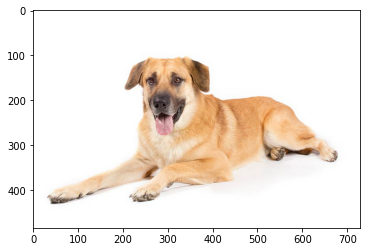

In [31]:
import matplotlib.image as mpimg

dog_test_path = join(os.getcwd(),'Chinook-On-White-03.jpg')
cat_test_path = join(os.getcwd(),'Thinking-of-getting-a-cat.png')

img = mpimg.imread(dog_test_path)
imgplot = plt.imshow(img)
plt.show()

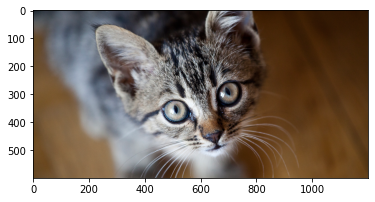

In [32]:
img = mpimg.imread(cat_test_path)
imgplot = plt.imshow(img)
plt.show()

In [35]:
features_out = get_features(get_image(cat_test_path))

prob = lg.predict_proba(features_out)
pred = lg.predict(features_out)

if pred[0] == 1:
    fpred = 'cat'
else:
    fpred = 'dog'
    
print("prob: {} and prediction: {}".format(prob,fpred))

prob: [[7.82527617e-08 9.99999922e-01]] and prediction: cat


### Repeat all previous steps using MobileNet V2 (https://github.com/KeyKy/mobilenet-mxnet). How the two networks compare?

In [36]:
!wget https://github.com/KeyKy/mobilenet-mxnet/raw/master/mobilenet_v2-symbol.json
!wget https://github.com/KeyKy/mobilenet-mxnet/raw/master/mobilenet_v2-0000.params

--2020-11-07 12:04:12--  https://github.com/KeyKy/mobilenet-mxnet/raw/master/mobilenet_v2-symbol.json
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/KeyKy/mobilenet-mxnet/master/mobilenet_v2-symbol.json [following]
--2020-11-07 12:04:13--  https://raw.githubusercontent.com/KeyKy/mobilenet-mxnet/master/mobilenet_v2-symbol.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.84.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.84.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108557 (106K) [text/plain]
Saving to: ‘mobilenet_v2-symbol.json’

mobilenet_v2-symbol 100%[===================>] 106.01K  --.-KB/s    in 0.05s   

2020-11-07 12:04:13 (1.99 MB/s) - ‘mobilenet_v2-symbol.json’ saved [108557/108557]

--2020-11-07 12:04:14--  https://gi

In [102]:
# define a simple data batch
from collections import namedtuple
Batch = namedtuple('Batch', ['data'])

In [103]:
context=mx.cpu()

In [104]:
def get_image(url, show=False):
    if url.startswith('http'):
        # download and show the image
        fname = mx.test_utils.download(url)
    else:
        fname = url
    img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
    if img is None:
         return None
    if show:
         plt.imshow(img)
         plt.axis('off')
    # convert into format (batch, RGB, width, height)
    img = cv2.resize(img, (224, 224))
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2)
    img = img[np.newaxis, :]
    return img

def predict(url):
    img = get_image(url, show=True)
    # compute the predict probabilities
    mod.forward(Batch([mx.nd.array(img)]))
    prob = mod.get_outputs()[0].asnumpy()
    # print the top-5
    prob = np.squeeze(prob)
    a = np.argsort(prob)[::-1]
    for i in a[0:5]:
        print('probability=%f, class=%s' %(prob[i], labels[i]))

In [105]:
sym, arg_params, aux_params = mx.model.load_checkpoint('mobilenet_v2', 0)

In [106]:
# list the last 10 layers
all_layers = sym.get_internals()
all_layers.list_outputs()[-5:]

['fc7_bias', 'fc7_output', 'fc7_flatten_output', 'prob_label', 'prob_output']

In [107]:
fe_sym = all_layers['fc7_flatten_output']
fe_mod = mx.mod.Module(symbol=fe_sym, context=mx.cpu(), label_names=None)
fe_mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))])
fe_mod.set_params(arg_params, aux_params)

In [108]:
def get_features(img):
    fe_mod.forward(Batch([mx.nd.array(img)]))
    features = fe_mod.get_outputs()[0].asnumpy()
    return features

In [109]:
img = get_image('https://icatcare.org/app/uploads/2018/07/Thinking-of-getting-a-cat.png')
features = get_features(img)
print("{}\n shape: {}".format(features,features.shape))

[[-8.73116531e+01  2.83228577e+02 -3.59607025e+02 -4.03708984e+02
  -6.46255798e+02  1.48531494e+02 -3.47858490e+02  6.66299515e+01
   2.78768982e+02 -1.49736664e+02  8.38041992e+01 -1.37439499e+02
  -4.69580017e+02 -9.14800415e+01 -2.76609131e+02  1.35187820e+02
   1.80837677e+02 -3.41249298e+02  1.15875607e+01 -5.60398926e+02
  -2.54541214e+02  3.32528320e+02  2.52942486e+01  4.03285645e+02
   2.14639755e+02 -4.70253792e+01 -4.01036255e+02 -2.38460938e+02
  -5.36336288e+01 -6.14872131e+02 -3.40083069e+02 -2.73898651e+02
  -3.69430878e+02 -6.40303528e+02 -2.56124176e+02 -4.16391968e+02
  -1.71422821e+02 -2.47153595e+02 -1.99477921e+02 -1.43629562e+02
  -3.21645264e+02 -4.46027039e+02 -2.44809418e+02  1.03301361e+02
  -1.46011917e+02 -4.25061462e+02 -3.44877625e+02 -5.04795135e+02
  -1.92245743e+02 -4.46315369e+02 -7.29045776e+02  6.43142151e+02
  -5.43736694e+02 -3.97714417e+02 -5.26605774e+02 -7.36024475e+02
  -1.60982224e+02 -2.95890625e+02 -7.81803040e+02 -3.25579132e+02
  -8.40681

In [110]:
from os import listdir
from os.path import isfile, join
import os


mypath = join(os.getcwd(),'train')

cats_imgs = [join(mypath,f) for f in listdir(mypath) if f.startswith('cat')]
dogs_imgs = [join(mypath,f) for f in listdir(mypath) if f.startswith('dog')]

In [111]:
print("cats: {} and dogs: {}".format(len(cats_imgs),len(dogs_imgs)))

cats: 12500 and dogs: 12500


In [112]:
Nmax = 100
cats_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]
dogs_features = [get_features(get_image(img)).ravel() for img in dogs_imgs[:Nmax]]

In [113]:
Y_cats = np.array(Nmax * [1])
Y_dogs = np.array(Nmax * [0])

In [114]:
X_cvd = np.vstack([cats_features,dogs_features])
Y_cvd = np.vstack([Y_cats,Y_dogs]).ravel()

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cvd, Y_cvd, random_state=42)

In [116]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression().fit(X_train, y_train)

print("Test set score: {:.2f}".format(lg.score(X_test, y_test)))

Test set score: 0.54


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


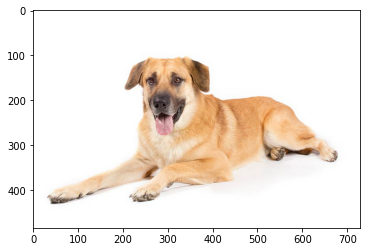

In [117]:
import matplotlib.image as mpimg

dog_test_path = join(os.getcwd(),'Chinook-On-White-03.jpg')
cat_test_path = join(os.getcwd(),'Thinking-of-getting-a-cat.png')

img = mpimg.imread(dog_test_path)
imgplot = plt.imshow(img)
plt.show()

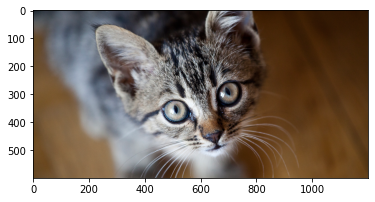

In [118]:
img = mpimg.imread(cat_test_path)
imgplot = plt.imshow(img)
plt.show()

In [119]:
features_out = get_features(get_image(cat_test_path))

prob = lg.predict_proba(features_out)
pred = lg.predict(features_out)

if pred[0] == 1:
    fpred = 'cat'
else:
    fpred = 'dog'
    
print("prob: {} and prediction: {}".format(prob,fpred))

prob: [[0.74842734 0.25157266]] and prediction: dog


##### Different networks apparently produced different results